# INDIAN COMPANIES REGISTRATION EXPLORATORY DATA ANALYSIS

![](https://i.ibb.co/qpkVfzs/Cover-Pic.png)

# exploratory-data-analysis-project

Use the "Run" button to execute the code.

Using Python, Pandas, Matplotlib, Seaborn, and Plotly, we will conduct exploratory data analysis on the companies registered in India between the years of 1857 and 2020 in this notebook.

1. Choose a dataset for analysis, then explain it.
2. Conduct data cleansing and preparation.
3. Explore data with analysis- Do the EDA
4. Ask and respond to questions regarding the information

## 1. Choosing the Dataset

#### 1.1 Brief Explanation about the data

In this analysis we will use the dataset "Indian Companies Registration Data [1857 - 2020]" found on [Kaggle](https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019).


The `registered_companies.csv` file contains the details of all Indian companies ever registered in India from 1857 to 2020.

*   Number of Rows= 1992170 
*   Number of Columns= 17 




Column description:

`CORPORATE_IDENTIFICATION_NUMBER` - Corporate Identification Number sometimes referred to as CIN is a unique identification number which is assigned by the ROC (Registrar of Companies) of various states under the MCA (Ministry of Corporate Affairs).

`COMPANY_NAME` - Name of the company.

`COMPANY_STATUS` - The 'Status' tell the current state of the company. Whether it is active and operating or dormant or it has been struck off and closed. There are 13 such status that a company could be carrying.

*  `ACTV` - Active 
*  `NAEF` - Not available for e-filing 
*  `ULQD` - Under liquidation 
*  `AMAL` - Amalgamated 
*  `STOF` - Strike off DISD - Dissolved 
*  `CLLD` - Converted to LLP and Dissolved 
*  `UPSO` - Under process of Striking Off 
*  `CLLP` - Converted to LLP 
*  `LIQD` - Liquidated 
*  `DRMT` - Dormant 
*  `MLIQ` - Vanished 
*  `D455` - Dormant under section 455

`COMPANY_CLASS` - Private and public companies are the two main categories of businesses. Private firms, often known as private limited companies, are closely held businesses with fewer than 200 shareholders. Limited corporations that are publicly traded on a stock exchange and have more than 200 shareholders are known as public companies. In this dataset, there are three kinds, namely, Public, Private, and Private (One Person Company). 

`COMPANY_CATEGORY` - The category of the company.

*   Company limited by Shares
*   Company Limited by Guarantee
*   Unlimited Company

`COMPANY_SUB_CATEGORY` - The sub-category of the company.

* Non-govt company 
* State Govt company 
* Subsidiary of Foreign Company 
* Guarantee and Association comp 
* Union Govt company

`DATE_OF_REGISTRATION` - Date of registration of the company.

`REGISTERED_STATE` - State in which company was registered.

`AUTHORIZED_CAP` - Authorized Capital of the company (INR)

`PAIDUP_CAPITAL` - Paid Up Capital of the company (INR).

`INDUSTRIAL_CLASS` - Industrial class of the company as per NIC 2004.

`PRINCIPAL_ BUSINESS_ACTIVITY_AS_PER_CIN` - Principal Business Activity of the company as per CIN.

`REGISTERED_OFFICE_ADDRESS` - Registered office address of the company.

`REGISTRAR_OF_COMPANIES` - Registrar office of the company.

`EMAIL_ADDR` - Email address of the companies owner/director.

`LATEST_YEAR_ANNUAL_RETURN` - Annual return of the last year.

`LATEST_YEAR_FINANCIAL_STATEMENT` - Financial Statement of the last year.

#### 1.2 Install the required packages and import *libraries* and *modules*

In [24]:
!pip install opendatasets --upgrade --quiet

In [25]:
!pip install jovian --quiet

In [26]:
import opendatasets as od
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import jovian

#### 1.3 Downloading the Data

Let's use the `opendatasets` library to download the data from Kaggle. Make sure to make a note of your Kaggle username and Kaggle access token as it would be required to get the download started.

In [27]:
dataset_url = "https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019"
od.download(dataset_url)

Skipping, found downloaded files in "./all-indian-companies-registration-data-1900-2019" (use force=True to force download)


Storing the downloaded file in a variable

In [28]:
data_filename = './all-indian-companies-registration-data-1900-2019/registered_companies.csv'

## Conducting Data Cleaning and Preparation

#### 2.1 Use Pandas to load the dataset into a data frame.

Let's use the Jupyter magic command `%%time` to measure the time it takes to import the Indian-registered companies data into a Pandas dataframe.

In [29]:
%%time
df = pd.read_csv(data_filename)

<timed exec>:1: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 15.6 s, sys: 3.18 s, total: 18.8 s
Wall time: 24.2 s


In [30]:
df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992165,U51109NL2000PTC006232,SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,20000.0,51109.0,Wholesale and retail trade repair of motor veh...,"BEHIND TOWN COMMITTEE,MKALABARI ROAD",ROC SHILLONG,NaN,NaN,NaN
1992166,U51109NL2000PTC006233,SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,200000.0,51109.0,Wholesale and retail trade repair of motor veh...,JAIN TEMPLE ROADDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992167,U51109NL2000PTC006259,STERN (INDIA) PLANTATION & MARKETING PRIVATE L...,STOF,Private,Company limited by Shares,Non-govt company,25-07-2000,Nagaland,200000.0,3000.0,51109.0,Wholesale and retail trade repair of motor veh...,RENGMA CHURCH BUILDINGKHERMAHALDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992168,U74950NL1998PTC005463,T.A. NGULLIE FRUIT PRODUCTS PVT LTD.,STOF,Private,Company limited by Shares,Non-govt company,09-07-1998,Nagaland,2500000.0,0.0,74950.0,Real estate renting and business activities,"CHUMUKEDIME,BLOCK-3, DIST.KOHIMA.",ROC SHILLONG,rks97cs@yahoo.com,NaN,NaN


#### 2.2 Explore the data

Let's get a quick overview of our dataset.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

In [32]:
df.columns

Index(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY',
       'DATE_OF_REGISTRATION', 'REGISTERED_STATE', 'AUTHORIZED_CAP',
       'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS',
       'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'REGISTERED_OFFICE_ADDRESS',
       'REGISTRAR_OF_COMPANIES', 'EMAIL_ADDR', 'LATEST_YEAR_ANNUAL_RETURN',
       'LATEST_YEAR_FINANCIAL_STATEMENT'],
      dtype='object')

Now, we are checking how many missing values each column has.


In [33]:
df.isna().sum().sort_values(ascending=False)

LATEST_YEAR_ANNUAL_RETURN                 831317
LATEST_YEAR_FINANCIAL_STATEMENT           828829
EMAIL_ADDR                                370208
REGISTRAR_OF_COMPANIES                     42198
REGISTERED_OFFICE_ADDRESS                  15259
COMPANY_SUB_CATEGORY                        5090
COMPANY_CATEGORY                            5085
COMPANY_CLASS                               5078
INDUSTRIAL_CLASS                            4811
DATE_OF_REGISTRATION                        2525
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        12
CORPORATE_IDENTIFICATION_NUMBER                0
PAIDUP_CAPITAL                                 0
COMPANY_NAME                                   0
REGISTERED_STATE                               0
COMPANY_STATUS                                 0
AUTHORIZED_CAP                                 0
dtype: int64

Now, we will be plotting the same using a bar graph to have a better understanding of the data

In [34]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)

<Axes: >

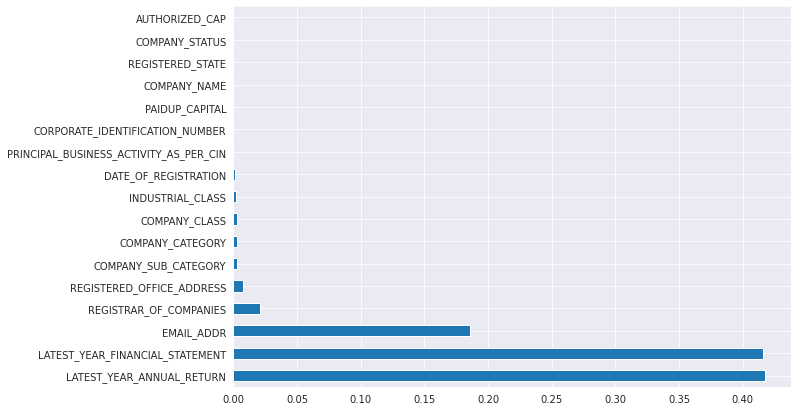

In [35]:
missing_percentage.plot(kind='barh')

Since the EMAIL_ADDR, LATEST_YEAR_FINANCIAL_STATEMENT, and LATEST_YEAR_ANNUAL_RETURN has a lot of missing values, we will not be exploring and analysing those columns.

### 3. Exploratory Analysis and Visualizations

#### Inspecting the columns of our Dataframe to understand the dataframe in a better way.

1. COMPANY_STATUS

Let us look at the unique values in COMPANY_STATUS column.

In [36]:
df.COMPANY_STATUS.value_counts()

ACTV    1190101
STOF     688886
UPSO      41457
AMAL      24893
CLLP      13175
DISD       9769
NAEF       9286
ULQD       6460
CLLD       4874
D455       2145
LIQD       1121
DRMT          2
MLIQ          1
Name: COMPANY_STATUS, dtype: int64

2. COMPANY_CLASS

Let's look at the unique classes of the company and number of companies in each class.

In [37]:
df.COMPANY_CLASS.value_counts()

Private                        1819264
Public                          137612
Private(One Person Company)      30216
Name: COMPANY_CLASS, dtype: int64

3. COMPANY_CATEGORY

Let's see which "COMPANY_CATEGORY" has the most number of companies registered. 

In [38]:
df.COMPANY_CATEGORY.value_counts()

Company limited by Shares       1963899
Company Limited by Guarantee      22219
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64

4. COMPANY_SUB_CATEGORY

We will be looking at the sub-categories of the registered companies.

In [39]:
df.COMPANY_SUB_CATEGORY.value_counts()

Non-govt company                  1969838
Subsidiary of Foreign Company       12369
Guarantee and Association comp       2385
State Govt company                   1912
Union Govt company                    576
Name: COMPANY_SUB_CATEGORY, dtype: int64

5. REGISTERED_STATE

Let's have a look at the unique States and Union Territories in our dataframe.

In [40]:
df.REGISTERED_STATE.unique()

array(['Gujarat', 'Karnataka', 'Rajasthan', 'Madhya Pradesh',
       'Uttaranchal', 'Assam', 'Jharkhand', 'Tamil Nadu', 'Delhi',
       'Maharashtra', 'Haryana', 'Chattisgarh', 'Daman and Diu',
       'West Bengal', 'Lakshadweep', 'Himachal Pradesh',
       'Dadra and Nagra Haveli', 'Kerala', 'Pondicherry',
       'Jammu and Kashmir', 'Bihar', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Uttar Pradesh', 'Telangana', 'Chandigarh',
       'Punjab', 'Orissa', 'Goa', 'Meghalaya', 'Tripura', 'Sikkim',
       'Mizoram', 'Manipur', 'Andaman and Nicobar Islands', 'Nagaland'],
      dtype=object)

####Convert the required columns to the required datatypes


Converting the `DATE_OF_REGISTRATION` column to datetime datatype as it will help us extract the Months or Years separately. 

In [41]:
df.DATE_OF_REGISTRATION = pd.to_datetime(df.DATE_OF_REGISTRATION,errors="coerce",infer_datetime_format=True)

Setting the Preset of figures

In [105]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.color'] = 'Black'
#plt.rcParams['axes.labelcolor'] = 'grey'


### Representing the comparison between States and UTs for total number of companies registered.

In [96]:
states_by_most_reg_companies= df.REGISTERED_STATE.value_counts()

In [97]:
states_by_most_reg_companies

Maharashtra                    395282
Delhi                          348230
West Bengal                    207005
Tamil Nadu                     150871
Karnataka                      125779
Uttar Pradesh                  116337
Telangana                      112401
Gujarat                        105554
Rajasthan                       61370
Kerala                          56098
Haryana                         51039
Madhya Pradesh                  41318
Bihar                           35920
Andhra Pradesh                  33050
Punjab                          32440
Orissa                          27023
Jharkhand                       15078
Chandigarh                      15018
Assam                           12078
Chattisgarh                     10703
Goa                              8942
Uttaranchal                      8924
Himachal Pradesh                 6591
Jammu and Kashmir                5978
Pondicherry                      3454
Meghalaya                        1115
Manipur     

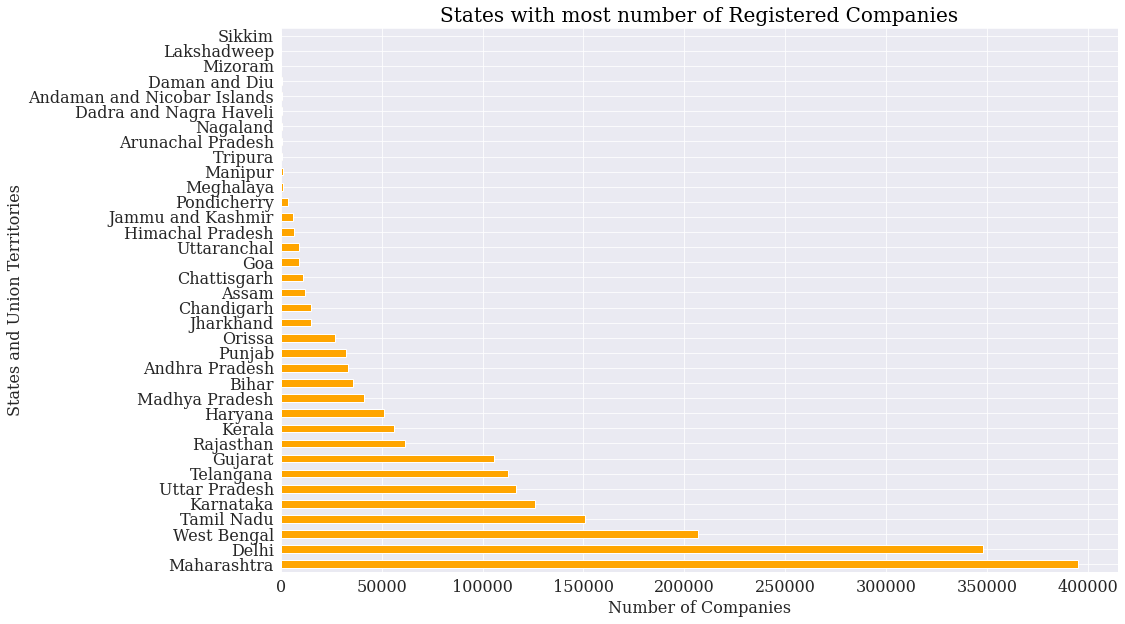

In [98]:
plt.figure(figsize=(15,10))
plt.ylabel('States and Union Territories') 
plt.xlabel('Number of Companies')
plt.title("States with most number of Registered Companies", fontsize=20)
states_by_most_reg_companies.plot(kind='barh', color='orange');

**Observations**:
1. Maharashtra accounts for the highest number of registered companies followed by Delhi, West Bengal, and Tamil Nadu.
2. One reason behind the highest number of registered companies in Maharashtra can be the presence of two largest Indian stock markets in Mumbai. 
3. Another reason behind the high number of registered companies can be the good connectivity of these areas. Maharashtra, Delhi, and West bengal has the best connectivity in terms of ports and Airports.
4. Similarly, due to the geographical isolation of the North-eastern region, they are very less number of companies registered in those areas.

### Number of Companies Registered distributed across years.

Extracting the year out of the `DATE_OF_REGISTRATION` column and making a new column `Year` to store it.

In [46]:
df['Year'] = df['DATE_OF_REGISTRATION'].dt.strftime('%Y')

Creating a new dataframe, `year_count`, which will include the year-wise count of companies registered. 

In [47]:
year_count=pd.DataFrame(df.groupby('Year')['Year'].count()).rename(columns={'Year': 'Count'}).reset_index().sort_values(by='Year',ascending=True)
year_count_1 = year_count.tail(20)
year_count_1

,Year,Count
131,2001,22220
132,2002,23148
133,2003,28275
134,2004,37230
135,2005,51501
136,2006,49935
137,2007,63305
138,2008,70605
139,2009,61145
140,2010,86901


Now, we are plotting this data in a Bar-Chart for a better representation

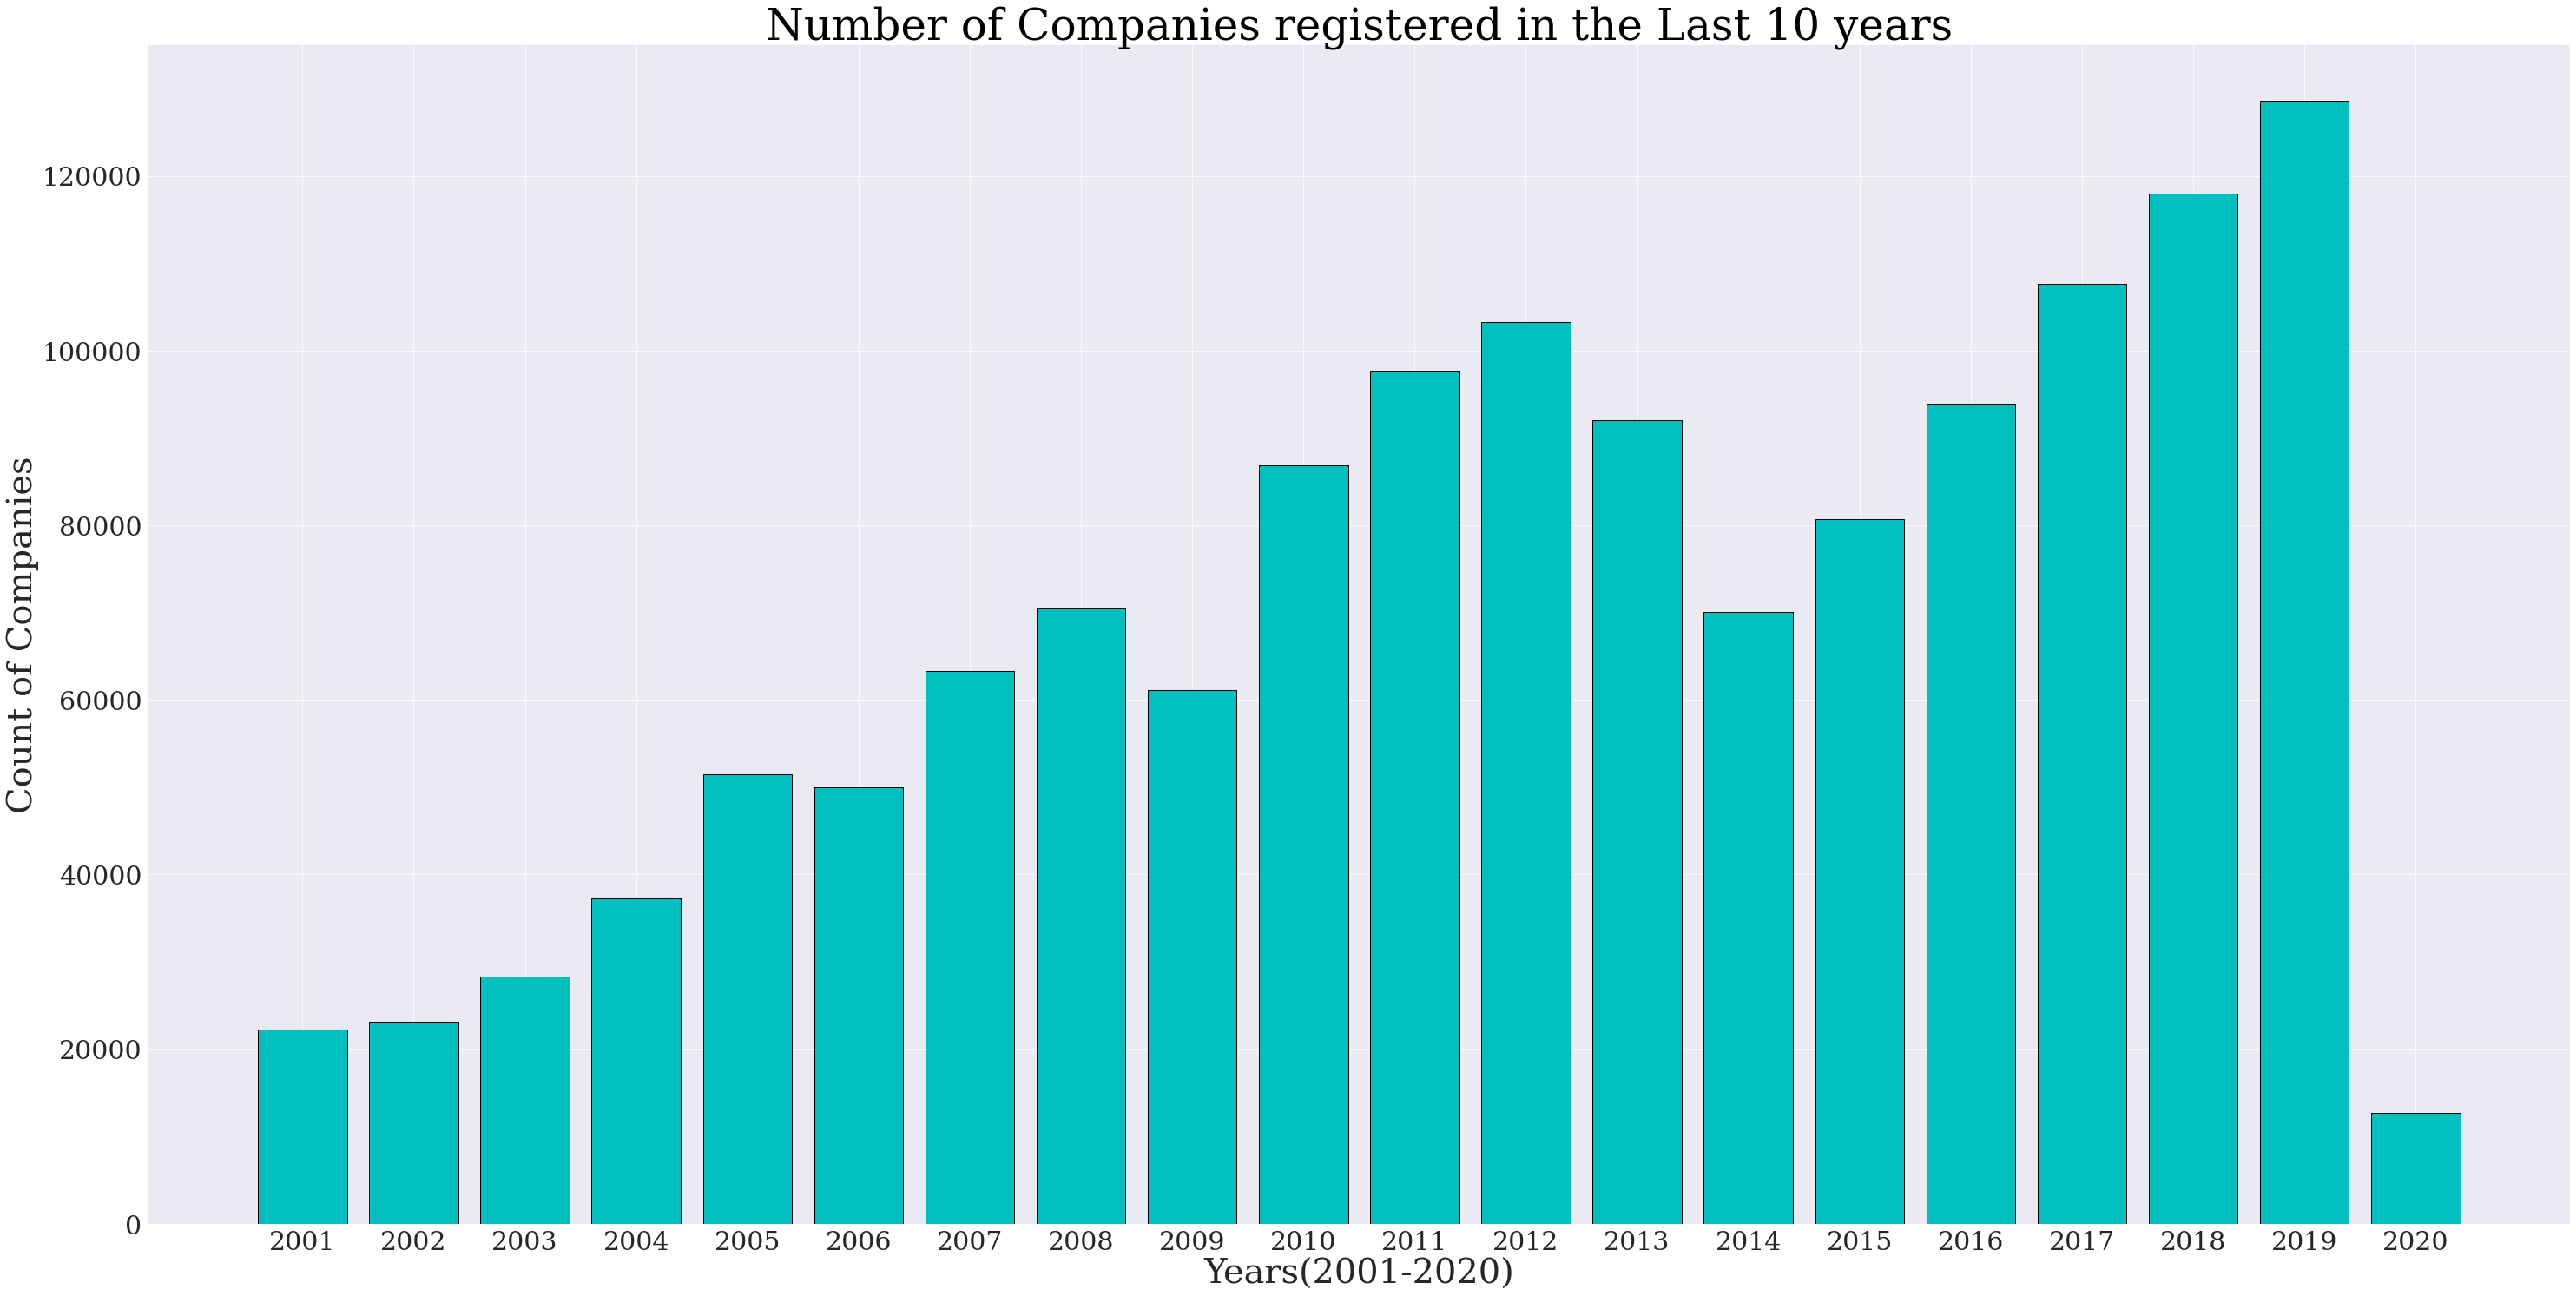

In [99]:
plt.figure(figsize=(50,25))
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)
plt.xlabel("Years(2001-2020)", fontsize=40)
plt.ylabel("Count of Companies",fontsize=40)
plt.title("Number of Companies registered in the Last 10 years", fontsize=50)
plt.bar(year_count_1['Year'],year_count_1['Count'], edgecolor='black', color='c');

**Observations:**

1. The number of companies getting registered after the **year 2001** has increased drastically.
2. Despite the continuous increase, the number of companies registered **dropped** drastically in the year **2014**. The reason behind this decline could be the ammendment of the **Companies Act in year 2013**. The impact of this Act effected the number of companies registered in 2014 because about 60% of the provisions of the Company Act 2013 were activated from April 1, 2014.
![xyz](https://i.ibb.co/nrhFH70/Screenshot-2023-03-23-230626.png)
3. After 2014, the number again rose consistently.
4. In the year 2020, we have seen a drastic drop in number of registered companies. This can be due to covid-19 pandemic and multiple phases of lockdown all over the world. 

### Comparison of the activities Active Companies in the top states in last 10 Years

Getting the top states list and the last 10 years list from the dataframe

In [49]:
top_states = states_by_most_reg_companies[:10].index.tolist()
top_states

['Maharashtra',
 'Delhi',
 'West Bengal',
 'Tamil Nadu',
 'Karnataka',
 'Uttar Pradesh',
 'Telangana',
 'Gujarat',
 'Rajasthan',
 'Kerala']

In [50]:
last_10_years = df.Year.sort_values(ascending=False).dropna().unique()[:10].tolist()
last_10_years

['2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

Running the query to get the filtered values, i.e., Active Companies (Status=ACTV) in the top states in the last 10 years.

In [51]:
filtered_values = np.where((df['REGISTERED_STATE'].isin(top_states)) & (df['COMPANY_STATUS'].str.contains('ACTV')) & (df['Year'].isin(last_10_years)))
filtered_values

(array([     41,      42,      44, ..., 1904641, 1904642, 1904643]),)

Using the numpy array to create a new dataframe of filtered values.

In [52]:
filtered_df = pd.DataFrame(df.loc[filtered_values])

Grouping the `filtered_df` on the basis of primary activities of business   ('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN').

In [53]:
grouped_series = filtered_df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')

In [54]:
grouped_series.size()

PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
Activities of private households as employers and undifferentiated production activities of private households        90
Agriculture & allied                                                                                               18353
Construction                                                                                                       36427
Education                                                                                                          11983
Electricity gas and water supply                                                                                    7096
Extraterritorial organizations and bodies                                                                             21
Financial intermediation                                                                                           16818
Health and social work                                                                                            

In [55]:
myexplode = [0.2, 0.2, 0, 0.2, 0.2, 0.2, 0.2, 0.2 , 0.2, 0, 0.2, 0.2, 0.2, 0, 0.2, 0]

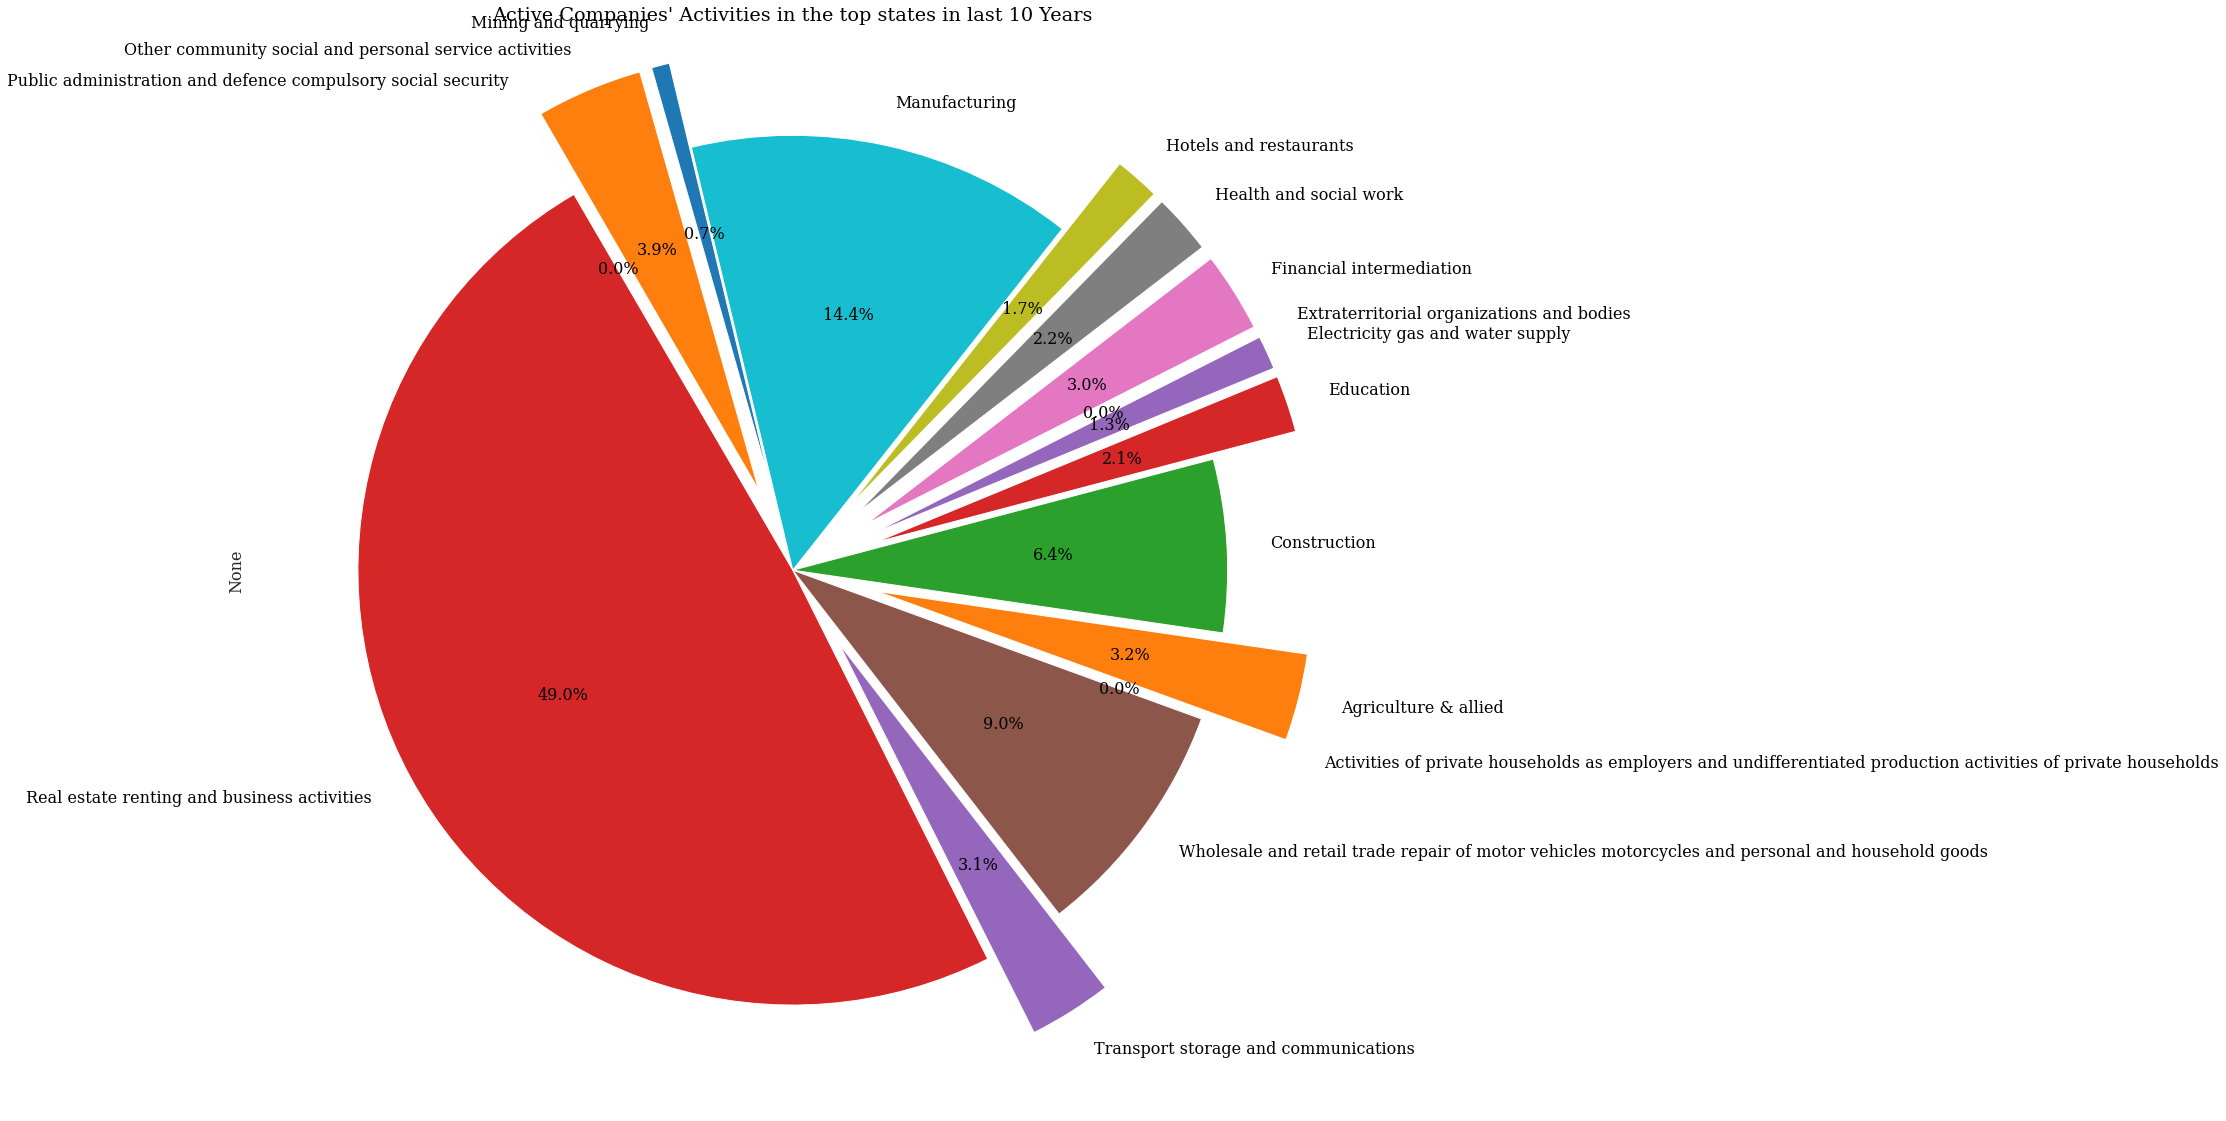

In [102]:
grouped_series.size()
grouped_series.size().plot.pie(y='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN',autopct='%1.1f%%',figsize=(20,20),startangle=340,explode=myexplode, title="Active Companies' Activities in the top states in last 10 Years");

**Observations:**
1. There are multiple kinds of activities done by the registered businesses but Real Estate Renting business is the dominating participant among these.
2. Manufacturing comes at second highest principal activity done by businesses. Manufacturing is one of the major occupations in India, therefore, it had to be among the top business activities. However, agriculture, which is the primary occupation of India, does not have a lot of registered enterprises. This could be because Agriculture sector in India is unorganized and therefore, there are not many agricultural companies that are registered. 


### Comparison between Types of Companies Registered in 2010s

Creating a table grouped by Year of Registration to see the rate of growth in each kind of business industry.

In [57]:
table = filtered_df.groupby('Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().unstack().fillna(0)

In [58]:
table

PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Activities of private households as employers and undifferentiated production activities of private households,Agriculture & allied,Construction,Education,Electricity gas and water supply,Extraterritorial organizations and bodies,Financial intermediation,Health and social work,Hotels and restaurants,Manufacturing,Mining and quarrying,Other community social and personal service activities,Public administration and defence compulsory social security,Real estate renting and business activities,Transport storage and communications,Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods
Year,,,,,,,,,,,,,,,,
2011,7.0,1184.0,4662.0,760.0,582.0,1.0,999.0,834.0,791.0,7936.0,549.0,1459.0,14.0,16575.0,1316.0,6468.0
2012,7.0,1006.0,4747.0,852.0,667.0,1.0,982.0,888.0,784.0,7384.0,518.0,1542.0,9.0,18528.0,1348.0,5784.0
2013,11.0,1127.0,4145.0,815.0,704.0,0.0,980.0,991.0,701.0,6898.0,398.0,1661.0,9.0,18165.0,1226.0,3467.0
2014,1.0,1065.0,2473.0,565.0,470.0,3.0,881.0,725.0,518.0,5272.0,277.0,1075.0,6.0,16242.0,1010.0,2768.0
2015,6.0,1740.0,2547.0,671.0,809.0,2.0,1223.0,852.0,649.0,6171.0,277.0,1270.0,8.0,25493.0,1348.0,3379.0
2016,12.0,2672.0,3594.0,824.0,908.0,5.0,1730.0,924.0,984.0,8206.0,288.0,1568.0,34.0,41855.0,2034.0,5157.0
2017,12.0,2376.0,3871.0,1633.0,798.0,4.0,2207.0,1304.0,1255.0,9099.0,378.0,3573.0,34.0,48339.0,2162.0,5639.0
2018,16.0,2843.0,4413.0,2227.0,887.0,2.0,2906.0,1880.0,1554.0,11158.0,482.0,4655.0,51.0,50412.0,2609.0,6763.0
2019,15.0,3974.0,5492.0,3340.0,1134.0,3.0,4468.0,3867.0,2125.0,17583.0,569.0,5099.0,32.0,38848.0,4055.0,10418.0


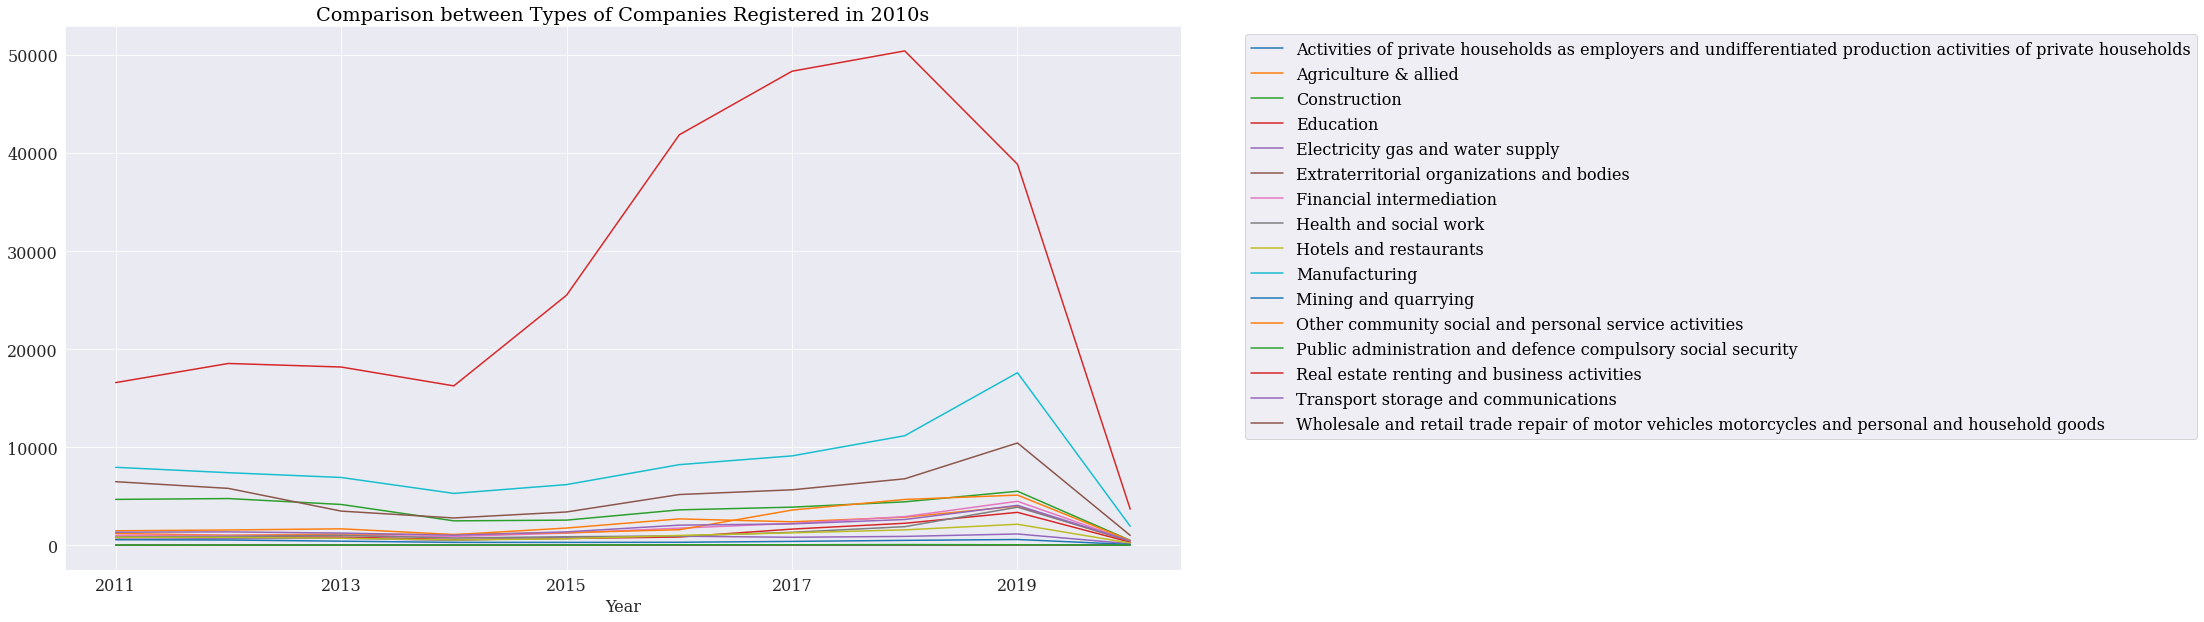

In [108]:
table.plot.line(figsize=(20,10), title="Comparison between Types of Companies Registered in 2010s", legend=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

We saw above that the 2019 year accounted for the highest number of companies registered. Adding to this point, we also saw that the highest number of active companies are the companies whose principal business activity is related to Real Estate. But from this figure, it is quite clear that in 2019, the number of registrations declined for Real Estate companies. 

On the other hand, Manufacturing sector accounted a high rate of growth in this period.

### Share of each State in terms of Authorized Capital and also the percentage of status of Companies in Each State

In [60]:
company_status_counts = df.COMPANY_STATUS.value_counts()
company_status_counts

ACTV    1190101
STOF     688886
UPSO      41457
AMAL      24893
CLLP      13175
DISD       9769
NAEF       9286
ULQD       6460
CLLD       4874
D455       2145
LIQD       1121
DRMT          2
MLIQ          1
Name: COMPANY_STATUS, dtype: int64

In [109]:
# The description of different status of companies
fig = px.sunburst(df, 
                 path=['REGISTERED_STATE','COMPANY_STATUS'], 
                 values='AUTHORIZED_CAP',
                 color_continuous_scale='RdBu')

fig.update_layout(title="Authorized Capital and Status of Companies in Each State")

fig.show()


**Observations:**
1. Since Maharashtra has the highest number of registered companies, it also has the largest share in terms of Authorized Capital.
2. Gujarat holds the second spot in terms of Authorized Capital. It is quite amazing because Gujarat was not among the Top 5 in the list of States with highest number of Registered Companies. It gives us an insight that Gujarat has some big companies that are flooded with the Authorized Capital.
3. In each state, the majority of companies have an Active Status, which is a good sign for a developing country like India. 

## Showcasing Largest Companies of India according to their Authorized Capital 

In [110]:
df.AUTHORIZED_CAP.astype(int)
df.AUTHORIZED_CAP.sample(10)

378107     105000000.0
865664        100000.0
283421        100000.0
1064037       100000.0
370713     170000000.0
505656      20000000.0
1565471       250000.0
1857476       100000.0
145277        100000.0
1529022      7100000.0
Name: AUTHORIZED_CAP, dtype: float64

Creating a dataframe that has the top 10 companies with the highest Authorized Capital. 

In [111]:
largest_cap_companies_df = df.sort_values(by = "AUTHORIZED_CAP", ascending=False)[:10]
largest_cap_companies_df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,Year
101396,U72900GJ2019PLC110816,JIO PLATFORMS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,2019-11-15,Gujarat,1.850000e+12,1.699613e+12,72900.0,Real estate renting and business activities,"Office - 101, Saffron, Nr. Centre Point,Panchw...",ROC AHMEDABAD,jyoti.jain@ril.com,NaN,NaN,2019
99038,U72900GJ2007PLC105869,RELIANCE JIO INFOCOMM LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,2007-02-15,Gujarat,1.600000e+12,1.541250e+12,72900.0,Real estate renting and business activities,"Office -101, SaffronNr. Centre Point, Panchwat...",ROC AHMEDABAD,jyoti.jain@ril.com,31-03-2019,31-03-2019,2007
1695580,U32201UP1999SGC024928,U. P. POWER CORPORATION LIMITED,ACTV,Public,Company limited by Shares,State Govt company,1999-11-30,Uttar Pradesh,1.250000e+12,9.390523e+11,32201,Manufacturing,SHAKTI BHAWANASHOK MARGLUCKNOW,ROC KANPUR,pradeepsoni2000@gmail.com,31-03-2018,31-03-2014,1999
596958,U74899DL1995PLC066685,TATA TELESERVICES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,1995-03-23,Delhi,1.000000e+12,4.484528e+11,74899,Real estate renting and business activities,"10TH FLOOR, TOWER I, JEEVAN BHARATI, 124CONNAU...",ROC DELHI,rishabh.aditya@tatatel.co.in,31-03-2019,31-03-2019,1995
1081992,U40100MH2005SGC153649,MSEB HOLDING COMPANY LIMITED,ACTV,Public,Company limited by Shares,State Govt company,2005-05-31,Maharashtra,9.900000e+11,8.910971e+11,40100,Electricity gas and water supply,HONGKONGBANK BLDG 3RD & 4THFLOOR MAHATMA GANDH...,ROC MUMBAI,msebhcl@gmail.com,31-03-2018,31-03-2018,2005
93702,U64200GJ2018PTC105652,JIO DIGITAL FIBRE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2018-12-17,Gujarat,9.000000e+11,7.865592e+11,64200.0,Transport storage and communications,"Office - 101, Saffron, Nr. Centre Point,Panchw...",ROC AHMEDABAD,Jyoti.Jain@ril.com,31-03-2019,31-03-2019,2018
40199,U45200GJ1988SGC010493,SARDAR SAROVAR NARMADA NIGAM LIMITED,ACTV,Public,Company limited by Shares,State Govt company,1988-03-24,Gujarat,6.000000e+11,5.901303e+11,45200.0,Construction,"BLOCKNO.12,1ST FLOORNEW SACHIVALAY COMPLEX",ROC AHMEDABAD,cs-ssnnl-gnr@gujarat.gov.in,31-03-2018,31-03-2019,1988
1083658,U40109MH2005SGC153645,MAHARASHTRA STATE ELECTRICITYDISTRIBUTION COMP...,ACTV,Public,Company limited by Shares,State Govt company,2005-05-31,Maharashtra,6.000000e+11,4.772398e+11,40109,Electricity gas and water supply,PRAKASHGAD PLOT NO G-9ANANT KANEKAR MARGBANDRA...,ROC MUMBAI,csmahadiscom@gmail.com,31-03-2018,31-03-2018,2005
157133,U51900KA2010PTC053234,AMAZON SELLER SERVICES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2010-04-16,Karnataka,6.000000e+11,3.348893e+11,51900,Wholesale and retail trade repair of motor veh...,"8TH FLOOR, BRIGADE GATEWAY26/1 DR. RAJKUMAR RO...",ROC BANGALORE,narkriti@amazon.com,31-03-2019,31-03-2019,2010
644,L32100GJ1996PLC030976,VODAFONE IDEA LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,1995-03-14,Gujarat,5.000000e+11,2.873539e+11,32100.0,Manufacturing,"SUMAN TOWER, PLOT NO.18,SECTOR-11,",ROC AHMEDABAD,pankaj.kapdeo@vodafoneidea.com,31-03-2019,31-03-2019,1995


Plotting the Dataframe into a horizontal Bar Chart 

<BarContainer object of 10 artists>

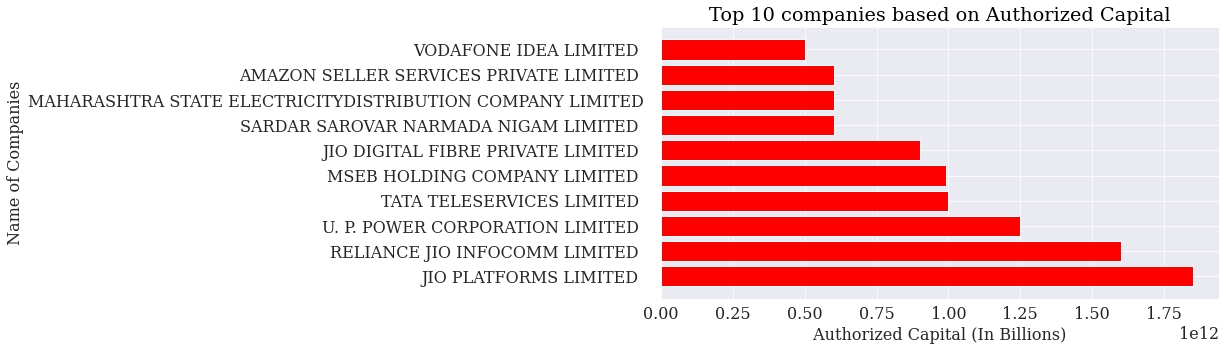

In [112]:
plt.figure(figsize=(10,5))
plt.title("Top 10 companies based on Authorized Capital")
plt.xlabel(" Authorized Capital (In Billions) ")
plt.ylabel(" Name of Companies ")
plt.barh(largest_cap_companies_df.COMPANY_NAME, largest_cap_companies_df.AUTHORIZED_CAP,color='red')

**Observations:**
1. Jio Platforms Limited and Reliance Jio Infocomm Limited are the top two companies with the highest Authorized Capital. No doubt, how Jio and Reliance are dominating the Indian markers.
2. UPPCL (Uttar Pradesh Power Corporation Ltd.) is the third largest company after JIO companies. UPCCL is the Electricity supplying company for the highest populating state in India, Uttar Pradesh.
3. UPCCL is followed by TATA, MSEB Holding Company Limited, Jio Digital Fibre, and other popular companies like Amazon and Vodafone Idea Ltd. 

## Ask and Answer Questions
 

### Question 1: Which Indian State accounts for the most number of companies registered from the year 1857 to 2020? Also, find out which State accounts for the lowest number of companies registered over all these years.

To analyse which states accounts for the most number of registered companies, we can create a political map of India using Chloropleth map of Plotly library. 

Firstly, we will be creating a well-defined list of states by using `groupby`.

In [65]:
states = df.groupby('REGISTERED_STATE').size().reset_index(name='NO_OF_COMPANIES')
states

,REGISTERED_STATE,NO_OF_COMPANIES
0,Andaman and Nicobar Islands,480
1,Andhra Pradesh,33050
2,Arunachal Pradesh,629
3,Assam,12078
4,Bihar,35920
5,Chandigarh,15018
6,Chattisgarh,10703
7,Dadra and Nagra Haveli,550
8,Daman and Diu,397
9,Delhi,348230


Loading the geoJson file of Indian Map

In [66]:
from urllib.request import urlopen
import json
indian_map_url= "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

response = urlopen(indian_map_url)
indian_data_json = json.loads(response.read())

print(indian_data_json)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[95.23391968067268, 26.68245856965871], [95.23282005383173, 26.705791937482644], [95.21038086477148, 26.73124215303452], [95.21647446882203, 26.755630964921654], [95.23108771748501, 26.765054996769667], [95.22916592824147, 26.785466234934876], [95.21476487961492, 26.7901109669967], [95.19731889611138, 26.82258347225182], [95.19804206866121, 26.838873109462586], [95.18153048666508, 26.86126527076989], [95.21486179974922, 26.883608420919657], [95.23026170400485, 26.883691279453185], [95.23190637286469, 26.919707474415166], [95.21216686467666, 26.930111922020178], [95.20211519185614, 26.958343043641676], [95.21140012293725, 26.965920877561512], [95.19149272591086, 26.98485697983234], [95.19716761622428, 27.001825910941804], [95.1946454837747, 27.031319394633655], [95.21090608726024, 27.029688361165416], [95.23336065098657, 27.037194967353923], [95.24634302711584, 27.023901567453

Renaming the States of our Dataframe according to their new names so that it matches with the State names present in our `json` file.

In [67]:
rename_states = {"Andaman and Nicobar Islands": "Andaman & Nicobar",
                "Jammu and Kashmir": "Jammu & Kashmir",
                "Orissa" : "Odisha",
                "Chattisgarh": "Chhattisgarh",
                "Dadra and Nagra Haveli": "Dadra and Nagar Haveli and Daman and Diu",
                "Pondicherry": "Puducherry",
                "Uttaranchal": "Uttarakhand"}

states.REGISTERED_STATE = states.REGISTERED_STATE.replace(rename_states)

Combining the Data for Daman and Diu and Dadra and Nagar Haveli as they are now a single UT under Indian Government

In [68]:
daman_diu_companies= states.loc[states['REGISTERED_STATE'] == "Daman and Diu"]['NO_OF_COMPANIES']
dadra_nagar_companies = states.loc[states['REGISTERED_STATE'] == "Dadra and Nagar Haveli and Daman and Diu"]['NO_OF_COMPANIES']
states.loc[states['REGISTERED_STATE'] == "Dadra and Nagar Haveli and Daman and Diu", 'NO_OF_COMPANIES'] = int(dadra_nagar_companies) + int(daman_diu_companies)

Now, let us add Ladakh to the states because Jammu and Kashmir and Ladakh are Separate Union Territories now

In [69]:
ladakh = pd.DataFrame([["Ladakh", 0.0]], columns=states.columns)
states= states.append(ladakh, ignore_index=True)

<ipython-input-69-3e849944464b>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Finally, creating Indian Map representing the States according to the companies registered in them.

In [70]:
fig = px.choropleth(
    states,
    geojson=indian_data_json,
    featureidkey='properties.ST_NM',
    locations='REGISTERED_STATE',
    color_continuous_scale="blues",
    hover_name="REGISTERED_STATE",
    hover_data= ["NO_OF_COMPANIES"],
    color='NO_OF_COMPANIES',
    title='Number of companies Registered Per State')
fig.update_geos(fitbounds="locations", visible=False,
        showframe=False,
        showcoastlines=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

As you can see from the figure above, the Maharashtra (Darkest Blue) state accounts for the most number of registered companies from 1857 to 2020. Maharashtra is followed by Delhi with the second highest number of registrations, but after Delhi, no state or union-territory is even close. On the other side, Sikkim accounts for the least number of companies.

### Question 2: Determine the Impact of Companies Act, 1956 on Registration of Companies.

To determine the impact of Companies Act, 1956, we can look at the number of registrations between 1950 and 1960.

In [71]:
independence_years=["1950","1951","1952","1953","1954","1955","1956","1957","1958","1959","1960"]

In [72]:
year_count_2= year_count.loc[year_count['Year'].isin(independence_years)]
year_count_2

,Year,Count
80,1950,1120
81,1951,1242
82,1952,830
83,1953,736
84,1954,841
85,1955,936
86,1956,1089
87,1957,702
88,1958,868
89,1959,1111


In [73]:
fig = px.line(year_count_2, x="Year", y="Count" , title='Impact of Companies Act, 1956 on Registration of Companies')
fig.show()

As we can see, the number of registration of companies declined heavily after the introduction of Companies Act in 1956. But after a year, when businessmen understood the Act in depth, the number of registrations rose again. This trend is common when a new policy or act is enacted by a governing body. The same pattern was seen when the Companies Act of 2013 was enacted.

### Question 3: Among all these years, which category of companies were registered the most?

In [74]:
company_category_df = pd.DataFrame(df.groupby('COMPANY_CATEGORY')['COMPANY_CATEGORY'].count()).rename(columns={'COMPANY_CATEGORY':'count'}).reset_index()
company_category_df

,COMPANY_CATEGORY,count
0,Company Limited by Guarantee,22219
1,Company limited by Shares,1963899
2,Unlimited Company,967


In [116]:
fig = px.pie(company_category_df, values='count',labels='COMPANY_CATEGORY', names='COMPANY_CATEGORY',hole=.3, title="Most Registered Category" )
fig.show()


This shows us that a huge majority of companies registered from 1857 till 2020 are limited by shares. Therefore, only a few companies(22219) are running as not-for-profit organisations. On the other hand, there are only a few "Unlimited Companies" present. 

### Question 4: Compare the Paid Up Capital of top 20 companies with their Authorized Capital

In [76]:
largest_20_companies_df = df.sort_values(by = "AUTHORIZED_CAP", ascending=False)[:20]
largest_20_companies_df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,Year
101396,U72900GJ2019PLC110816,JIO PLATFORMS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,2019-11-15,Gujarat,1.850000e+12,1.699613e+12,72900.0,Real estate renting and business activities,"Office - 101, Saffron, Nr. Centre Point,Panchw...",ROC AHMEDABAD,jyoti.jain@ril.com,NaN,NaN,2019
99038,U72900GJ2007PLC105869,RELIANCE JIO INFOCOMM LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,2007-02-15,Gujarat,1.600000e+12,1.541250e+12,72900.0,Real estate renting and business activities,"Office -101, SaffronNr. Centre Point, Panchwat...",ROC AHMEDABAD,jyoti.jain@ril.com,31-03-2019,31-03-2019,2007
1695580,U32201UP1999SGC024928,U. P. POWER CORPORATION LIMITED,ACTV,Public,Company limited by Shares,State Govt company,1999-11-30,Uttar Pradesh,1.250000e+12,9.390523e+11,32201,Manufacturing,SHAKTI BHAWANASHOK MARGLUCKNOW,ROC KANPUR,pradeepsoni2000@gmail.com,31-03-2018,31-03-2014,1999
596958,U74899DL1995PLC066685,TATA TELESERVICES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,1995-03-23,Delhi,1.000000e+12,4.484528e+11,74899,Real estate renting and business activities,"10TH FLOOR, TOWER I, JEEVAN BHARATI, 124CONNAU...",ROC DELHI,rishabh.aditya@tatatel.co.in,31-03-2019,31-03-2019,1995
1081992,U40100MH2005SGC153649,MSEB HOLDING COMPANY LIMITED,ACTV,Public,Company limited by Shares,State Govt company,2005-05-31,Maharashtra,9.900000e+11,8.910971e+11,40100,Electricity gas and water supply,HONGKONGBANK BLDG 3RD & 4THFLOOR MAHATMA GANDH...,ROC MUMBAI,msebhcl@gmail.com,31-03-2018,31-03-2018,2005
93702,U64200GJ2018PTC105652,JIO DIGITAL FIBRE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2018-12-17,Gujarat,9.000000e+11,7.865592e+11,64200.0,Transport storage and communications,"Office - 101, Saffron, Nr. Centre Point,Panchw...",ROC AHMEDABAD,Jyoti.Jain@ril.com,31-03-2019,31-03-2019,2018
40199,U45200GJ1988SGC010493,SARDAR SAROVAR NARMADA NIGAM LIMITED,ACTV,Public,Company limited by Shares,State Govt company,1988-03-24,Gujarat,6.000000e+11,5.901303e+11,45200.0,Construction,"BLOCKNO.12,1ST FLOORNEW SACHIVALAY COMPLEX",ROC AHMEDABAD,cs-ssnnl-gnr@gujarat.gov.in,31-03-2018,31-03-2019,1988
1083658,U40109MH2005SGC153645,MAHARASHTRA STATE ELECTRICITYDISTRIBUTION COMP...,ACTV,Public,Company limited by Shares,State Govt company,2005-05-31,Maharashtra,6.000000e+11,4.772398e+11,40109,Electricity gas and water supply,PRAKASHGAD PLOT NO G-9ANANT KANEKAR MARGBANDRA...,ROC MUMBAI,csmahadiscom@gmail.com,31-03-2018,31-03-2018,2005
157133,U51900KA2010PTC053234,AMAZON SELLER SERVICES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2010-04-16,Karnataka,6.000000e+11,3.348893e+11,51900,Wholesale and retail trade repair of motor veh...,"8TH FLOOR, BRIGADE GATEWAY26/1 DR. RAJKUMAR RO...",ROC BANGALORE,narkriti@amazon.com,31-03-2019,31-03-2019,2010
644,L32100GJ1996PLC030976,VODAFONE IDEA LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,1995-03-14,Gujarat,5.000000e+11,2.873539e+11,32100.0,Manufacturing,"SUMAN TOWER, PLOT NO.18,SECTOR-11,",ROC AHMEDABAD,pankaj.kapdeo@vodafoneidea.com,31-03-2019,31-03-2019,1995


In [114]:
fig = go.Figure()
fig.add_trace(go.Bar(y=largest_20_companies_df['COMPANY_NAME'],
                     x=largest_20_companies_df['AUTHORIZED_CAP'],
                     text=largest_20_companies_df['AUTHORIZED_CAP'],
                     name="Authorized Capital (INR)",
                     orientation='h',
                     marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(y=largest_20_companies_df['COMPANY_NAME'],
                     x=largest_20_companies_df['PAIDUP_CAPITAL'],
                     text=largest_20_companies_df['PAIDUP_CAPITAL'],
                     name="Paid Up Capital (INR)",
                     orientation='h',
                     marker_color='rgb(26, 118, 255)'))

fig.update_layout(
    autosize=False,
    title="Authorized Capital VS Paidup Capital",
    width=1300,
    height=1000,
    barmode='group',
    bargap=0.2,
    font=dict(size=10),
    yaxis_title='Name of the Companies',
    xaxis_title='Amount (INR)')
fig.update_traces(textposition='outside')
fig.show()

The largest companies in terms of Authorized and Paid up Capital is Jio Platforms Limited. However, companies like Thakur Fininvest Pvt. Ltd., Bharat Sanchar Pvt Ltd., and DLF Asset Ltd.  have not raise much capital from the public by diluting the shares as their Paid Up Capital is quite low as compared to their Authorized Capital. 

For those who don't know, Authorised Capital is the maximum value of shares that a company can issue to its shareholders. And Paid-Up Capital is the total value of the shares issued to the public.

### Question 5: What is the average Authorized Capital of the top 100 Companies?

Sorting top 100 companies on the basis of Authorized Capital

In [78]:
largest_100_companies_df = df.sort_values(by = "AUTHORIZED_CAP", ascending=False)[:100]

Creating a Box Plot from the new dataframe we have created.

In [115]:
fig = px.box(largest_100_companies_df, x="AUTHORIZED_CAP", title="Distribution of Authorized Capital of top 100 Companies")
fig.show()

As you can see (by hovering), the median Authorized Capital of the top 100 Companies is 170 Billion. However, among the Top 100 companies also, there are seven outliers, which could be among the Top 10 largest companies.

### Question 6: Among all the registered firms, which Company Status is most frequently used?

In [80]:
company_current_status = df.groupby("COMPANY_STATUS").size().reset_index(name='NO_OF_COMPANIES')
status_description = {"ACTV": "Active",
          "NAEF": "Not available for e-filing",
          "ULQD": "Under liquidation",
          "AMAL": "Amalgamated",
          "STOF": "Strike off",
          "DISD": "Dissolved",
          "CLLD": "Converted to LLP and Dissolved",
          "UPSO": "Under process of Striking Off",
          "CLLP": "Converted to LLP",
          "LIQD": "Liquidated",
          "DRMT": "Dormant",
          "MLIQ": "Vanished",
          "D455": "Dormant under section 455"
         }
company_current_status.COMPANY_STATUS= company_current_status.COMPANY_STATUS.replace(status_description)
  
company_current_status

,COMPANY_STATUS,NO_OF_COMPANIES
0,Active,1190101
1,Amalgamated,24893
2,Converted to LLP and Dissolved,4874
3,Converted to LLP,13175
4,Dormant under section 455,2145
5,Dissolved,9769
6,Dormant,2
7,Liquidated,1121
8,Vanished,1
9,Not available for e-filing,9286


In [113]:
fig = px.pie(company_current_status,
             values='NO_OF_COMPANIES',
             names='COMPANY_STATUS',
             title='Companies Current Status',
             hole=.3,
             )
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()


The most number of companies that got registered in all these years are active. Active Companies account for 59.7% of all. However, 34.6% of the companies registered are struck off, which means that they been removed from the official Registrar of Companies(RoC) and are no longer legally recognized as valid businesses.

### Question 7: Since Year 2019 accounted for the most number of registration of companies, find out which is the principal business activity of those companies as per CIN.

In [82]:
year_2019_df = df.loc[df['Year']=="2019"]
year_2019_df 

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,Year
69,F06415,ATNAHS PHARMA UK LIMITED,ACTV,NaN,NaN,NaN,2019-02-02,Gujarat,0.0,0.0,NaN,Agriculture & allied,"1st, 2nd & 3rd FloorBuilding Vismay 2, GIPCL C...",ROC DELHI,JINS.JOSEPH@ATNAHS.COM,NaN,NaN,2019
1338,U01100GJ2019NPL107175,ZEN CHARITABLE FOUNDATION,ACTV,Private,Company Limited by Guarantee,Non-govt company,2019-03-22,Gujarat,0.0,0.0,1100.0,Agriculture & allied,"8th Floor, The Chambers,Opp. Gurudwara, S. G. ...",ROC AHMEDABAD,cs@zengroup.co.in,NaN,NaN,2019
1339,U01100GJ2019OPC106427,SATAMAR SUPPLIER (OPC) PRIVATE LIMITED,ACTV,Private(One Person Company),Company limited by Shares,Non-govt company,2019-02-05,Gujarat,100000.0,10000.0,1100.0,Agriculture & allied,"C/5, Krushan Kunj Society,Nr Saraswati Vidhyal...",ROC AHMEDABAD,manishsakariya77@gmail.com,NaN,NaN,2019
1340,U01100GJ2019OPC107031,AGRIM AGROTECH (OPC) PRIVATE LIMITED,ACTV,Private(One Person Company),Company limited by Shares,Non-govt company,2019-03-12,Gujarat,100000.0,100000.0,1100.0,Agriculture & allied,"B-2, 204, VACHNAMRUT RESIDENCYVALAK TALUKO KAM...",ROC AHMEDABAD,shreeplastic15@gmail.com,NaN,NaN,2019
1341,U01100GJ2019OPC109172,SHAKUNTALAM EXPORT (OPC) PRIVATE LIMITED,ACTV,Private(One Person Company),Company limited by Shares,Non-govt company,2019-07-18,Gujarat,100000.0,100000.0,1100.0,Agriculture & allied,"111, HIGH FIELD ASCOTOPP. PALM AVENUE, VIP ROA...",ROC AHMEDABAD,NAGGMANI@GMAIL.COM,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992144,U45309NL2019PTC013490,DIABASE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2019-08-14,Nagaland,1000000.0,200000.0,45309.0,Construction,"H/NO204,Lane 4B,Khel Kuda Village,Nagarjan,Dim...",ROC SHILLONG,rkbaudit@gmail.com,NaN,NaN,2019
1992145,U45309NL2019PTC013497,MASON BUILDERS CONSTRUCTION PRIVATELIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2019-10-17,Nagaland,1500000.0,500000.0,45309.0,Construction,"C/o Nikhezhe Sumi, Niusa Colony,Thilixu Villag...",ROC SHILLONG,angkha.sumi@gmail.com,NaN,NaN,2019
1992149,U45400NL2019PTC013483,NORTH EAST INFRASTRUCTURE AND AGROMARKETING DE...,ACTV,Private,Company limited by Shares,Non-govt company,2019-05-31,Nagaland,1500000.0,500000.0,45400.0,Construction,C/O SUSUNUKSHIPATIZUNG WARD,ROC SHILLONG,lepzungjamir058@gmail.com,NaN,NaN,2019
1992154,U50100NL2019PTC013474,KASHLIWAL AGENCIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2019-03-01,Nagaland,30000000.0,800000.0,50100.0,Wholesale and retail trade repair of motor veh...,HOUSE OF SUBHASH KUMAR KASHLIWAL JAINNEAR DIMA...,ROC SHILLONG,abhinandankashliwal@gmail.com,NaN,NaN,2019


In [83]:
pd.DataFrame(year_2019_df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN').size().reset_index(name="Number of Companies").sort_values(by="Number of Companies", ascending=False))
                                                                                                                    

,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Number of Companies
13,Real estate renting and business activities,47801
9,Manufacturing,22279
15,Wholesale and retail trade repair of motor veh...,13476
2,Construction,7963
11,Other community social and personal service ac...,6659
1,Agriculture & allied,5663
6,Financial intermediation,5316
14,Transport storage and communications,5097
7,Health and social work,4922
3,Education,4395


As you can see, the Real estate renting and business activities	are the most frequent Busniess Activity from the companies registered in 2019. On the other hand, only 3 companies related to "Extraterritorial organizations and bodies" were registered in the year 2019. 

### Question 8: Represent the number of companies registered over last 10 years across different months.

Creating a new dataframe including only the companies that registered in the last 10 years.

In [84]:
years_2010s = np.where(df['Year'].isin(last_10_years))

In [85]:
filtered_values_to_get_months = pd.DataFrame(df.loc[years_2010s])

Creating a new column, `Month` from the `DATE_OF_REGISTRATION` column

In [86]:
filtered_values_to_get_months['Month'] = filtered_values_to_get_months['DATE_OF_REGISTRATION'].dt.month
filtered_values_to_get_months


,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,Year,Month
41,F04062,TBEA SHENYANG TRANSFORMER GROUP CO. LTD.,ACTV,NaN,NaN,NaN,2011-01-07,Gujarat,0.0,0.0,NaN,Agriculture & allied,"""TBEA GREEN ENERGY PARK""NATIONAL HIGHWAY NO. 8...",ROC DELHI,rutvik.patel@tbeaindia.com,NaN,NaN,2011,1
42,F04122,MSP SYSTEMS LIMITED,ACTV,NaN,NaN,NaN,2011-04-15,Gujarat,0.0,0.0,NaN,Agriculture & allied,"102, Gala Argos, Nr. Harikrupa Tower,Gujarat C...",ROC DELHI,amit.d@msp-group.co.uk,NaN,NaN,2011,4
43,F04209,WEGH GROUP SRL,NAEF,NaN,NaN,NaN,2011-09-16,Gujarat,0.0,0.0,NaN,Agriculture & allied,"A 301 SAFAL PEGASUS, OPP. KIRAN MOTORS100 FT R...",ROC DELHI,f.decicco@gwegh.it,NaN,NaN,2011,9
44,F04235,GEOGLOBAL RESOURCES (BARBADOS) INC.,ACTV,NaN,NaN,NaN,2011-11-02,Gujarat,0.0,0.0,NaN,Agriculture & allied,"304-305, IT TOWER-IIINFOCITY",ROC DELHI,nitin.thaker@geoglobal.com,NaN,NaN,2011,11
45,F04237,GEOGLOBAL RESOURCES (BARBADOS) INC.,ACTV,NaN,NaN,NaN,2011-11-08,Gujarat,0.0,0.0,NaN,Agriculture & allied,"304-305, IT TOWER-IIINFOCITY",ROC DELHI,nitin.thaker@geoglobal.com,NaN,NaN,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992155,U50101NL2012PTC008325,OKUSA AUTOMOBILES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2012-08-28,Nagaland,25000000.0,22500000.0,50101.0,Wholesale and retail trade repair of motor veh...,"H. NO. 143, WALFORDOPP. ARMY CANTONMENT",ROC SHILLONG,okusatoyota@yahoo.com,31-03-2019,31-03-2019,2012,8
1992156,U50200NL2013PTC008356,YEPTHOMI MOTORS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2013-09-18,Nagaland,30000000.0,21000000.0,50200.0,Wholesale and retail trade repair of motor veh...,MASJID ROADPURANA BAZAR,ROC SHILLONG,accountant@cityford.co.in,31-03-2017,31-03-2017,2013,9
1992159,U50400NL2019PTC013484,VERTEX AUTOMOTIVE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,2019-06-24,Nagaland,5000000.0,10000.0,50400.0,Wholesale and retail trade repair of motor veh...,"HOUSE NO.01, PURANA BAZAARDIMAPUR",ROC SHILLONG,eliteautomotivepvtltd@gmail.com,NaN,NaN,2019,6
1992160,U51101NL2011PLC008311,DOYANG TRADECOM LIMITED,UPSO,Public,Company limited by Shares,Non-govt company,2011-12-01,Nagaland,1000000.0,500000.0,51101.0,Wholesale and retail trade repair of motor veh...,"H.NO. 219, DUNCAN BOSTI",ROC SHILLONG,str_udz@yahoo.com,NaN,NaN,2011,12


Pivoting the above table to make it suitable for representing a heatmap.

In [87]:
formatted_table_for_heatmap = filtered_values_to_get_months.groupby('Month')['Year'].value_counts().unstack().fillna(0)
formatted_table_for_heatmap

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,
1,7901.0,8106.0,5522.0,8228.0,6907.0,7378.0,6979.0,8663.0,12475.0,12747.0
2,9090.0,8774.0,6486.0,7527.0,6157.0,8777.0,9878.0,8020.0,11789.0,0.0
3,9788.0,12473.0,6916.0,9783.0,7046.0,7875.0,11306.0,12043.0,10590.0,0.0
4,7875.0,9117.0,9041.0,768.0,6062.0,3996.0,9029.0,10559.0,10390.0,0.0
5,8587.0,8885.0,10564.0,1813.0,6867.0,10220.0,9679.0,10774.0,11294.0,0.0
6,8395.0,8001.0,8074.0,4825.0,7216.0,9269.0,9050.0,9049.0,9629.0,0.0
7,7561.0,8034.0,8798.0,7258.0,7024.0,8562.0,9398.0,7751.0,10712.0,0.0
8,7990.0,8857.0,7197.0,6698.0,6912.0,8746.0,9430.0,7749.0,10009.0,0.0
9,7924.0,8142.0,7520.0,6883.0,6286.0,7936.0,8858.0,13405.0,9173.0,0.0


Plotting the table in the Heatmap

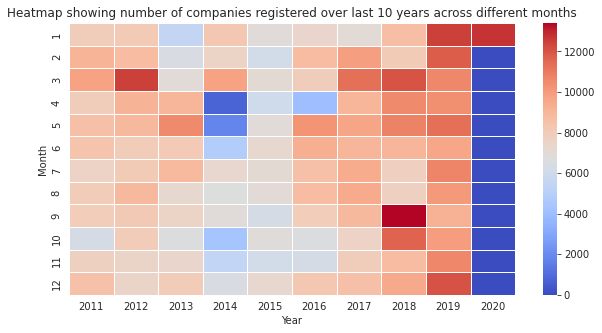

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Heatmap showing number of companies registered over last 10 years across different months')
sns.heatmap(formatted_table_for_heatmap, linewidth=.5, cmap = sns.color_palette("coolwarm", as_cmap=True));


1. Among the months across the past 10 years, there is not any strong pattern followed when it comes to number of registered companies.
2. But still, we can see dark patches near the month of March and January in some years. 
3. The darkest patch in this Heatmap is on September 2019

In [89]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Summary and Conclusions

In this case study we have analysed the registration of companies in India during the years 1857 - 2020.

Below is an overview of the *important insights*:

1. There were almost 2 million registered businesses.
2. Approximately 60% of the companies are still functioning as of 2020.
3. Maharashtra is the top state in terms of registrations and has the most permitted capital.
4. Among all the Companies, Reliance Jio has the highest Authorized and Paidup Capital
5. Various actions of government in the business sector, like Companies Act, 2013, affected the number of registrations of companies.
6. After the Covid-19 Pandemic, the number of registrations per year are expected to rise even more.

## Future Work

* The dataset can be merged with other Datasets related to companies and their profits to understand the most successful companies. 
* It can be further used to train a Machine Learning Model to give predictions about the future registrations of companies, 

## References


- Jovian tutorials
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)
- EDA - [Kaggle code](https://www.kaggle.com/datasets/shivkumarganesh/riots-in-india-19972022-acled-dataset-50k) by Shiv Kumar Ganesh

- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)